<h1>Outliers</h1>

<p>Note: Outliers are data points that significantly differ from the rest of the data in a dataset. They can be unusually high or low values compared to the majority of the data points. Outliers can arise due to various reasons such as measurement errors, data entry errors, natural variations, or anomalies in the underlying process being studied.</p>

<ul>
    <li>Skewing the Mean: Outliers can heavily influence the mean of the dataset, pulling it towards their extreme values and potentially misrepresenting the central tendency of the data.</li>
<li>Inflating Variance: Outliers can increase the variance of the dataset, leading to a wider spread of data points and affecting the accuracy of statistical estimates and predictions.</li>
<li>Biasing the Model: Outliers can bias the model parameters, especially in models like linear regression, where the model tries to minimize the sum of squared errors. Outliers with large residuals can disproportionately influence the model's coefficients.</li>
<li>Affecting Assumptions: Outliers can violate assumptions of certain statistical tests or models, leading to incorrect conclusions or unreliable predictions.</li>
</ul>

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [112]:
data = {'Exam Score': [23,30,50,56,70, 85, 90, 92, 88, 96, 87, 89, 94, 97,100,101,104,110, 150,270]}
df = pd.DataFrame(data)

In [113]:
df.head()

,Exam Score
0,23
1,30
2,50
3,56
4,70


<h1>Box Plot: Visualize the data using a box plot to identify potential outliers.</h1>

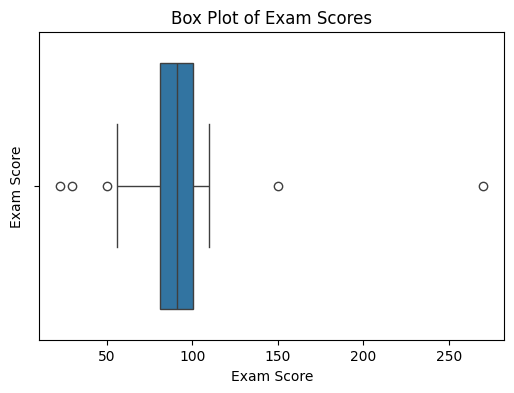

In [114]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Exam Score'])
plt.ylabel('Exam Score')
plt.title('Box Plot of Exam Scores')
plt.show()

<h1>Z-Score: Calculate the Z-score for each data point and identify data points with high absolute Z-scores.</h1>

In [115]:
from scipy.stats import zscore

In [116]:
df['Z-Score'] = zscore(df['Exam Score'])

In [117]:
df

,Exam Score,Z-Score
0,23,-1.453295
1,30,-1.310214
2,50,-0.901411
3,56,-0.778770
4,70,-0.492608
5,85,-0.186005
6,90,-0.083805
7,92,-0.042924
8,88,-0.124685
9,96,0.038836


In [118]:
outliers = df[(df['Z-Score'] > 3) | (df['Z-Score'] < -3)]
outliers

,Exam Score,Z-Score
19,270,3.595423


In [119]:
df.describe()

,Exam Score,Z-Score
count,20.000000,2.000000e+01
mean,94.100000,1.110223e-16
std,50.194254,1.025978e+00
min,23.000000,-1.453295e+00
25%,81.250000,-2.626560e-01
50%,91.000000,-6.336448e-02
75%,100.250000,1.257070e-01
max,270.000000,3.595423e+00


<h1>Removing outlirs from the data using 25th percentile and 75th percentile</h1>

In [120]:
df[(df['Exam Score'] > 81.25) & (df['Exam Score'] < 100.25)]

,Exam Score,Z-Score
5,85,-0.186005
6,90,-0.083805
7,92,-0.042924
8,88,-0.124685
9,96,0.038836
10,87,-0.145125
11,89,-0.104245
12,94,-0.002044
13,97,0.059276
14,100,0.120597


<h1>Lets practice detecting outliers from a dataset</h1>

In [121]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [122]:
tips.shape

(244, 7)

<h1>Before removing ouliers</h1>

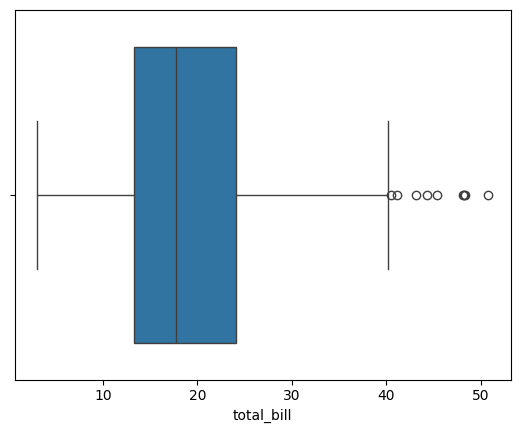

In [123]:
sns.boxplot(data=tips, x="total_bill")
plt.show()

In [124]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [125]:
removed_ouliers = tips[(tips["total_bill"] > 2.34) & (tips["total_bill"] < 37.12)]

<h1>After removing ouliers</h1>

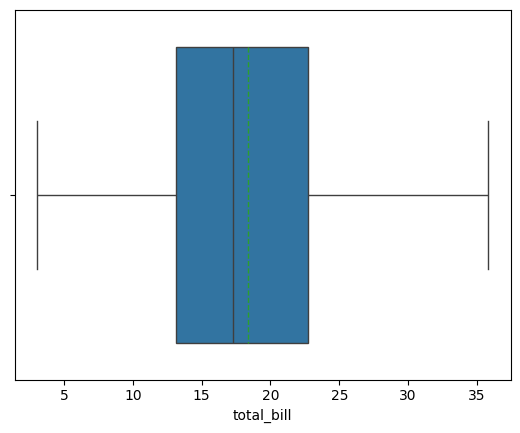

In [132]:
percentiles = [25, 50, 75, 90]
percentile_values = np.percentile(tips['total_bill'], percentiles)

mean_value = np.mean(tips['total_bill'])

sns.boxplot(data=removed_ouliers, x="total_bill", showmeans=True, meanline=True)

# Show plot
plt.show()

In [127]:
removed_ouliers.shape

(230, 7)

In [105]:
removed_ouliers.describe()

,total_bill,tip,size
count,230.000000,230.000000,230.000000
mean,18.362130,2.867565,2.495652
std,6.894048,1.190936,0.900014
min,3.070000,1.000000,1.000000
25%,13.137500,2.000000,2.000000
50%,17.275000,2.715000,2.000000
75%,22.730000,3.500000,3.000000
max,35.830000,6.700000,6.000000
